Reading data

This model perform prediction using the data of model  9th month

In [86]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt, seaborn as sns

In [87]:
# Imporing data

In [88]:
raw_data=pd.read_csv(r"telecom_churn_data.csv")
# raw_data=pd.read_csv(r"D:\Churn Data\Churn-\telecom_churn_data.csv")
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

dropping 'mobile_number ' & 'circle_id'

In [89]:
raw_data.shape

(99999, 226)

In [90]:
data=raw_data.copy()

In [91]:
data.drop(columns=['mobile_number', 'circle_id'],  inplace=True)

In [92]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [93]:

data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=224)

creating churn columns 

In [94]:
for i in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    print(f'for {i} null % is ',data[i].isna().sum())

for total_ic_mou_9 null % is  0
for total_og_mou_9 null % is  0
for vol_2g_mb_9 null % is  0
for vol_3g_mb_9 null % is  0


In [95]:
data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,188.04,72.11,0.00,0.00
2,517.74,124.94,0.00,8.42
3,305.38,362.54,0.00,0.00
4,205.31,104.59,0.00,0.00
...,...,...,...,...
99994,154.43,27.14,0.00,0.00
99995,108.84,106.41,0.00,0.00
99996,0.00,0.00,0.00,0.00
99997,2.21,0.00,85.67,4177.14


In [96]:
data['churn']=((data['total_ic_mou_9']+data['total_og_mou_9']+data['vol_3g_mb_9']+data['vol_2g_mb_9'])==0).astype('int')
# data.drop(columns=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], inplace=True)
data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn'],
      dtype='object', length=225)

as we have to predict on churm month i.e month 9 
so segrating month 9 data togrther i.e. TEST data

# segrating high value customers 
![image.png](attachment:image.png)

# what needs to be done
total_rech_amount= total_mobile_rech_6+total_mobile_rech_7+(av_recharge_data_6*total_rech_data_7)+(av_recharge_data_6*total_rech_data_7)

In [97]:
rech=data.columns[data.columns.str.contains('rech')]
data[rech]=data[rech].fillna(0)


In [98]:
# will drop this because i will need for 3 month

In [99]:
data['total_rech_amount_6_7']=(data['total_rech_amt_6']+data['total_rech_amt_7']+(data['av_rech_amt_data_6']*data['total_rech_data_6'])+(data['av_rech_amt_data_7']*data['total_rech_data_7']))/2
data=data[data['total_rech_amount_6_7']>=data['total_rech_amount_6_7'].quantile(.7)]
data.drop(columns=['total_rech_amount_6_7'], inplace=True)
data.shape

(30001, 225)

droping columns with more than 40 % missing

In [100]:
for i in data.columns:
    if data[i].isna().sum()/data.shape[0]>.4:
        data.drop(columns=i, inplace=True)
data.shape
    # data.drop()

(30001, 209)

Looking for columns having one category only 

In [101]:
for i in data.columns:
    if data[i].nunique()<2:
        print(i,data[i].unique())
        data.drop(columns=i, inplace=True)
data.shape

loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_9 ['9/30/2014' nan]
std_og_t2c_mou_6 [nan  0.]
std_og_t2c_mou_7 [nan  0.]
std_og_t2c_mou_8 [ 0. nan]
std_og_t2c_mou_9 [nan  0.]
std_ic_t2o_mou_6 [nan  0.]
std_ic_t2o_mou_7 [nan  0.]
std_ic_t2o_mou_8 [ 0. nan]
std_ic_t2o_mou_9 [nan  0.]


(30001, 194)

looking for columns with thier missing nan


In [102]:
data_missing=data.isna().sum()/data.shape[0]*100
data_missing.sort_values(ascending=False)
# maximum missing % is  6.33

loc_ic_t2t_mou_9            6.336455
loc_og_t2t_mou_9            6.336455
spl_ic_mou_9                6.336455
loc_og_t2f_mou_9            6.336455
loc_og_t2c_mou_9            6.336455
loc_og_mou_9                6.336455
loc_ic_mou_9                6.336455
std_ic_mou_9                6.336455
std_og_t2m_mou_9            6.336455
std_og_t2f_mou_9            6.336455
std_og_mou_9                6.336455
isd_og_mou_9                6.336455
std_ic_t2f_mou_9            6.336455
spl_og_mou_9                6.336455
og_others_9                 6.336455
std_ic_t2m_mou_9            6.336455
std_ic_t2t_mou_9            6.336455
loc_ic_t2m_mou_9            6.336455
loc_ic_t2f_mou_9            6.336455
loc_og_t2m_mou_9            6.336455
std_og_t2t_mou_9            6.336455
onnet_mou_9                 6.336455
ic_others_9                 6.336455
offnet_mou_9                6.336455
roam_og_mou_9               6.336455
roam_ic_mou_9               6.336455
isd_ic_mou_9                6.336455
s

In [103]:
# missing data is not huge and also for missing values in data we can safely impute 0  

In [104]:
data.fillna(0, inplace=True)
data_missing=data.isna().sum()/data.shape[0]*100
data_missing.sort_values(ascending=False)

arpu_6                      0.0
total_rech_data_7           0.0
total_rech_num_9            0.0
total_rech_amt_6            0.0
total_rech_amt_7            0.0
total_rech_amt_8            0.0
total_rech_amt_9            0.0
max_rech_amt_6              0.0
max_rech_amt_7              0.0
max_rech_amt_8              0.0
max_rech_amt_9              0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_9         0.0
last_day_rch_amt_6          0.0
last_day_rch_amt_7          0.0
last_day_rch_amt_8          0.0
last_day_rch_amt_9          0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_9    0.0
total_rech_num_8            0.0
total_rech_num_7            0.0
total_rech_num_6            0.0
spl_ic_mou_6                0.0
std_ic_t2f_mou_9            0.0
std_ic_mou_6                0.0
std_ic_mou_7                0.0
std_ic_mou_8                0.0
std_ic_m

In [105]:
data.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3000

Seprating churn month and traing data

In [106]:
col=data.columns.to_list()
churn_col=[i for i in col if i.endswith('9')]
data[churn_col].isna().sum()/data.shape[0]
churn_col.append('sep_vbc_3g')
churn_data=data[churn_col]
data.drop(columns=churn_col, inplace=True)
churn_data.head()

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,sep_vbc_3g
0,21.100,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,6,0,0,9/28/2014,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,3.58
7,500.000,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,3,0,0,9/30/2014,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,0.00
8,166.787,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,81.46,0.0,0.00,0.0,142.18,4.03,17.34,0.00,21.38,0.00,13.53,0.0,13.53,34.91,0.0,0.0,0.0,15,186,36,9/30/2014,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,0.00
21,578.596,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,137.53,131.64,762.34,0.00,893.99,0.0,0.00,0.0,1031.53,17.99,113.46,8.41,139.88,16.74,95.98,0.0,112.73,252.61,0.0,0.0,0.0,17,680,50,9/30/2014,30,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,0.00
23,811.480,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,101.93,0.00,11.44,3.89,15.34,0.0,10.35,0.0,127.63,45.36,75.83,0.00,121.19,1.08,5.20,0.0,6.28,127.48,0.0,0.0,0.0,4,252,252,9/28/2014,0,9/9/2014,1.0,252.0,0.0,1.0,252.0,13.93,314.74,0,0,1,0,0.00


In [107]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48

In [108]:
data.drop(columns=data.select_dtypes('O'), inplace=True)

EDA

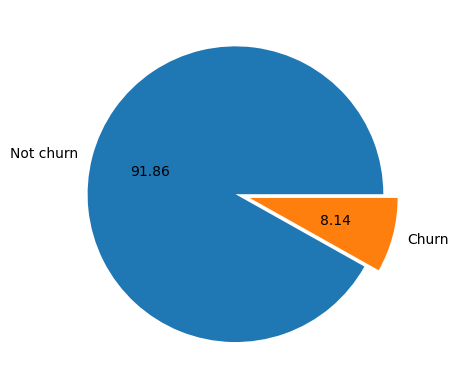

In [109]:
plt.pie(x=data['churn'].value_counts(), explode=[0,.1], labels=['Not churn','Churn'], autopct='%.2f');

In [110]:
og_relation_6=data.columns[(data.columns.str.contains('og_')) & (data.columns.str.contains('_6'))]
og_relation_7=data.columns[(data.columns.str.contains('og_')) & (data.columns.str.contains('_7'))]
og_relation_8=data.columns[(data.columns.str.contains('og_')) & (data.columns.str.contains('_8'))]

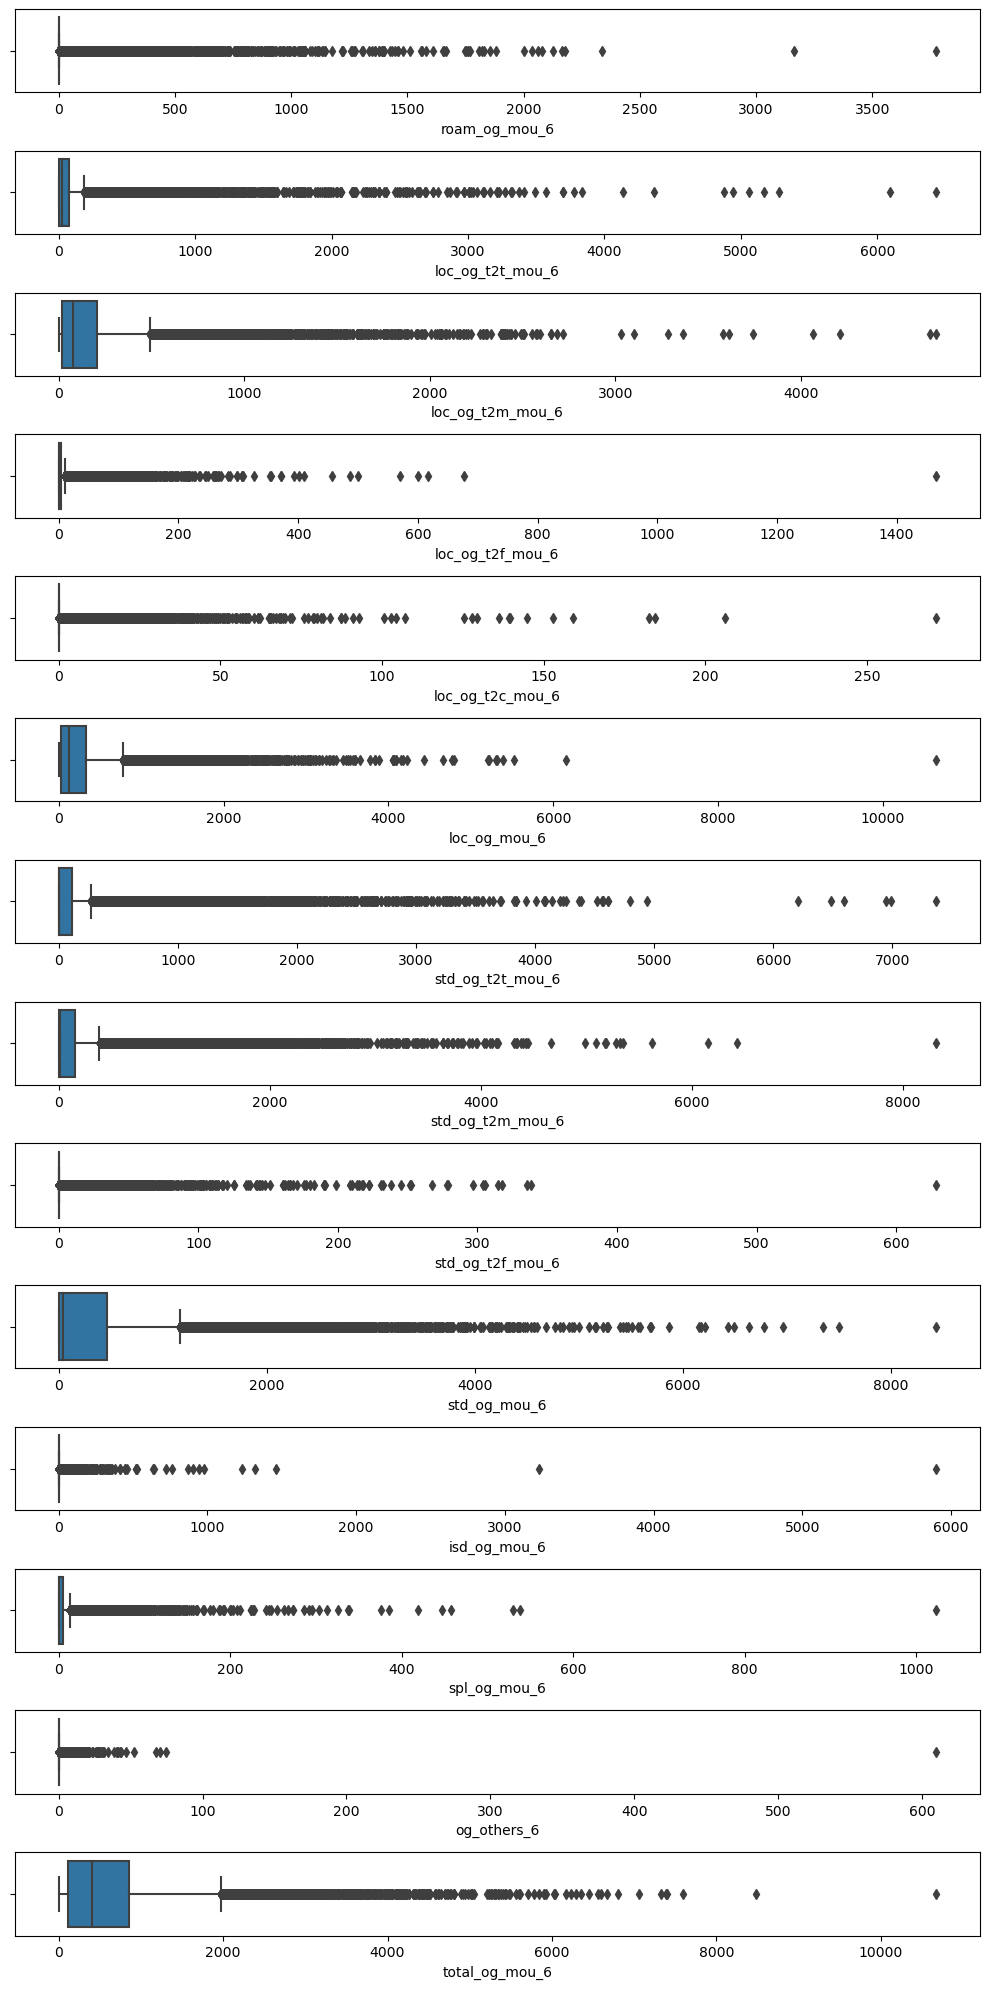

In [111]:
fig, axes= plt.subplots(nrows=len(og_relation_6), figsize=(10,20))
for i,cat in enumerate(og_relation_6):
    sns.boxplot(x=data[cat],ax=axes[i])
plt.tight_layout()


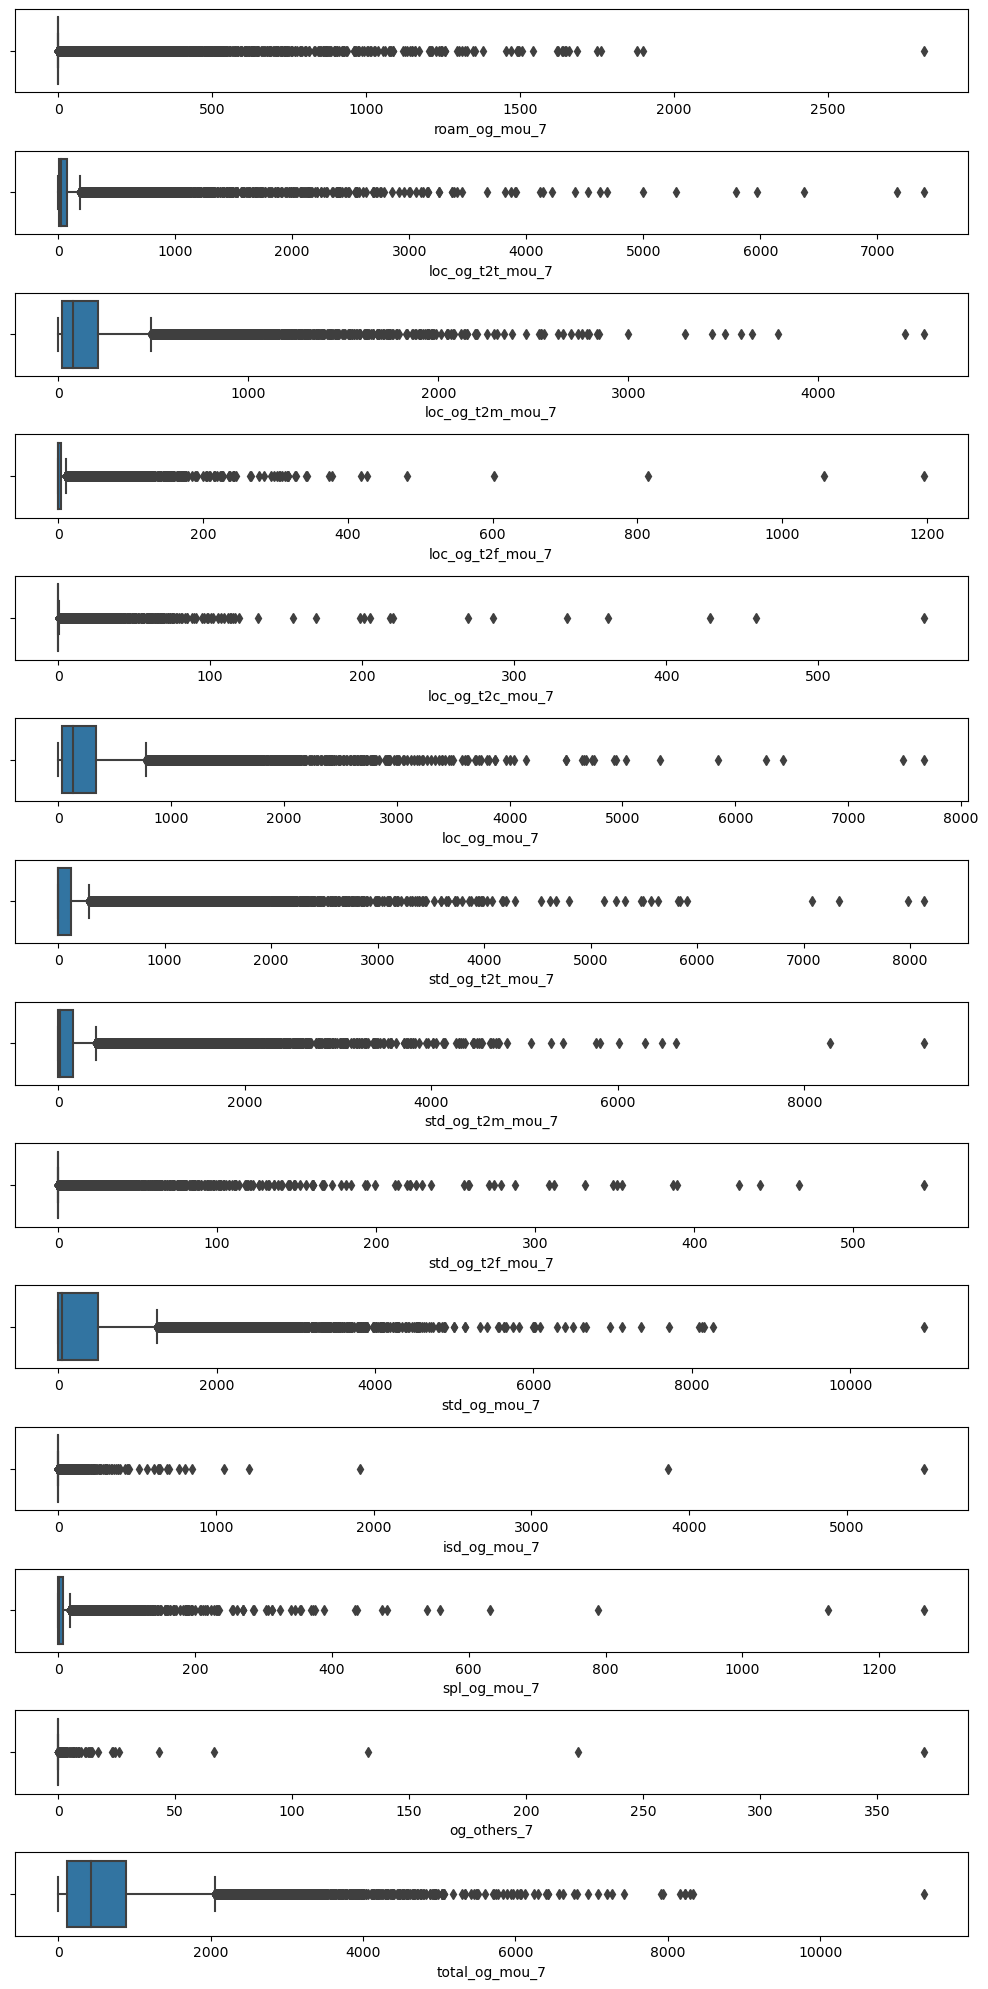

In [112]:
fig, axes= plt.subplots(nrows=len(og_relation_7), figsize=(10,20))
for i,cat in enumerate(og_relation_7):
    sns.boxplot(x=data[cat],ax=axes[i])
plt.tight_layout()

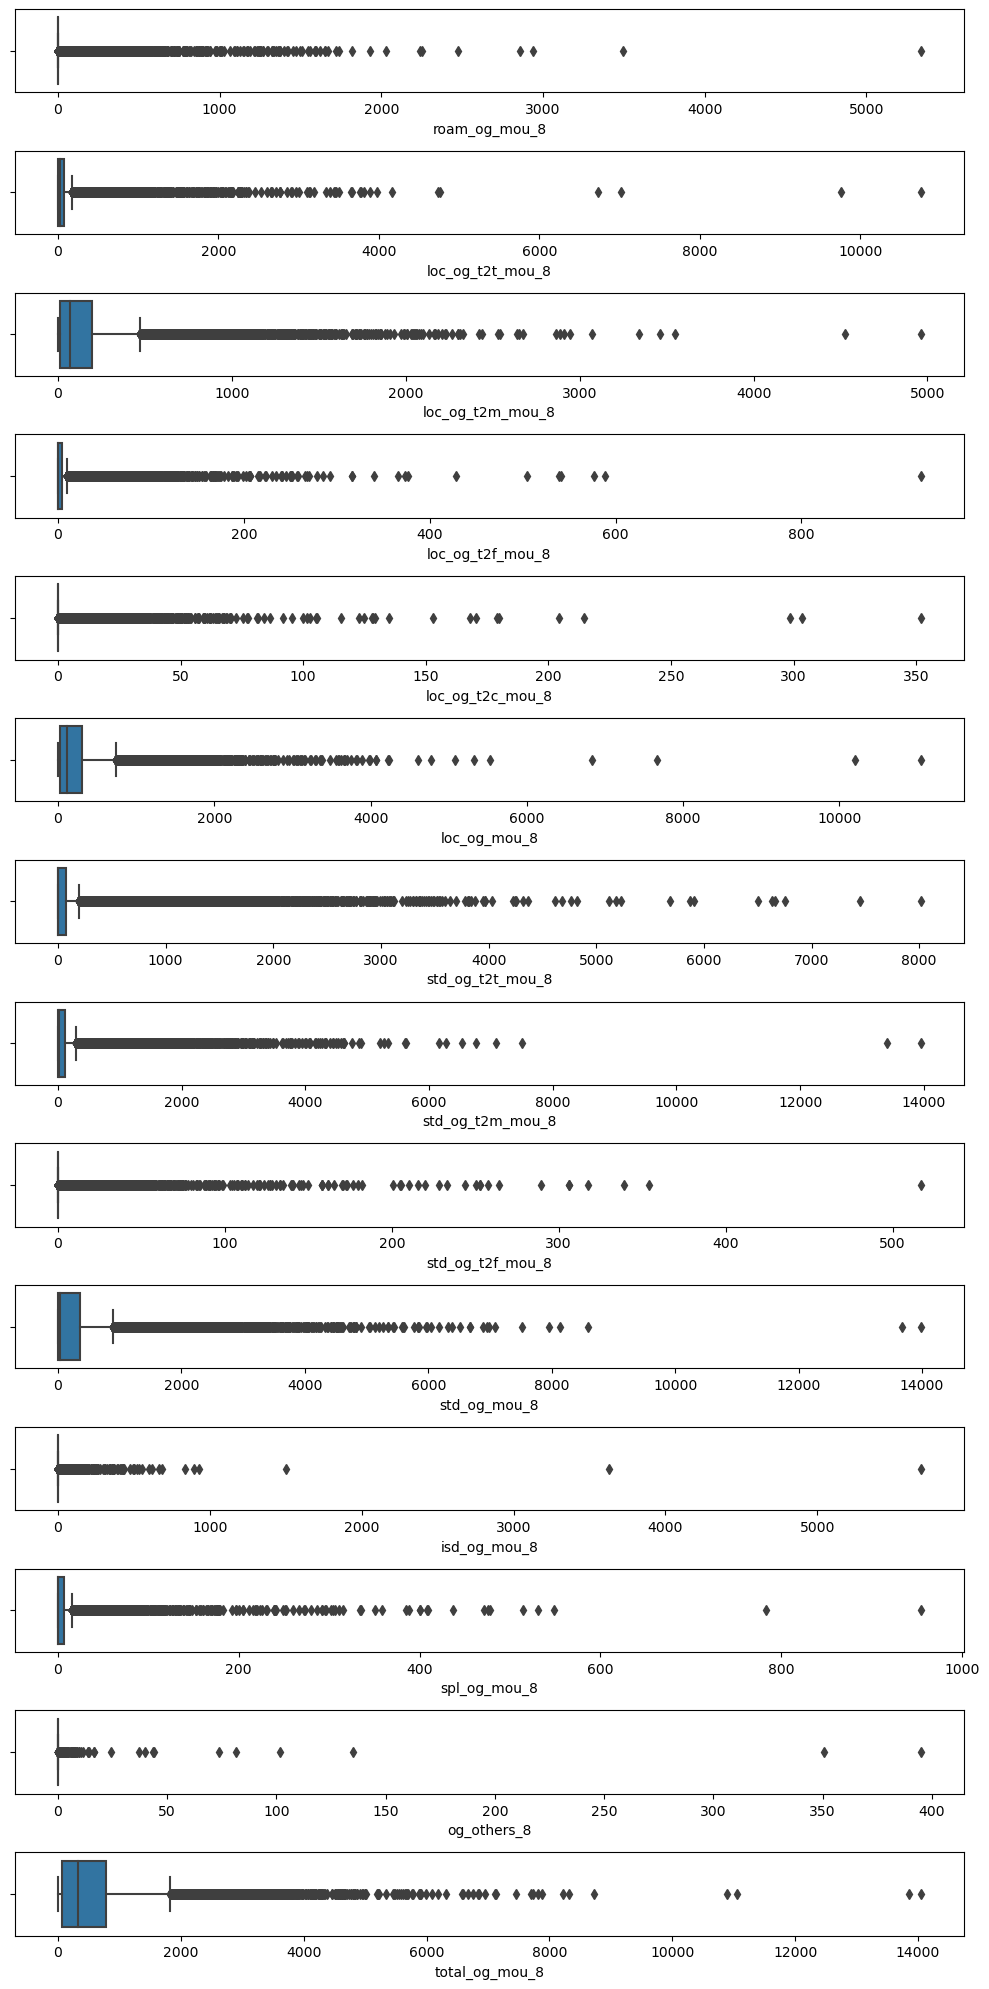

In [113]:
fig, axes= plt.subplots(nrows=len(og_relation_8), figsize=(10,20))
for i,cat in enumerate(og_relation_8):
    sns.boxplot(x=data[cat],ax=axes[i])
plt.tight_layout()

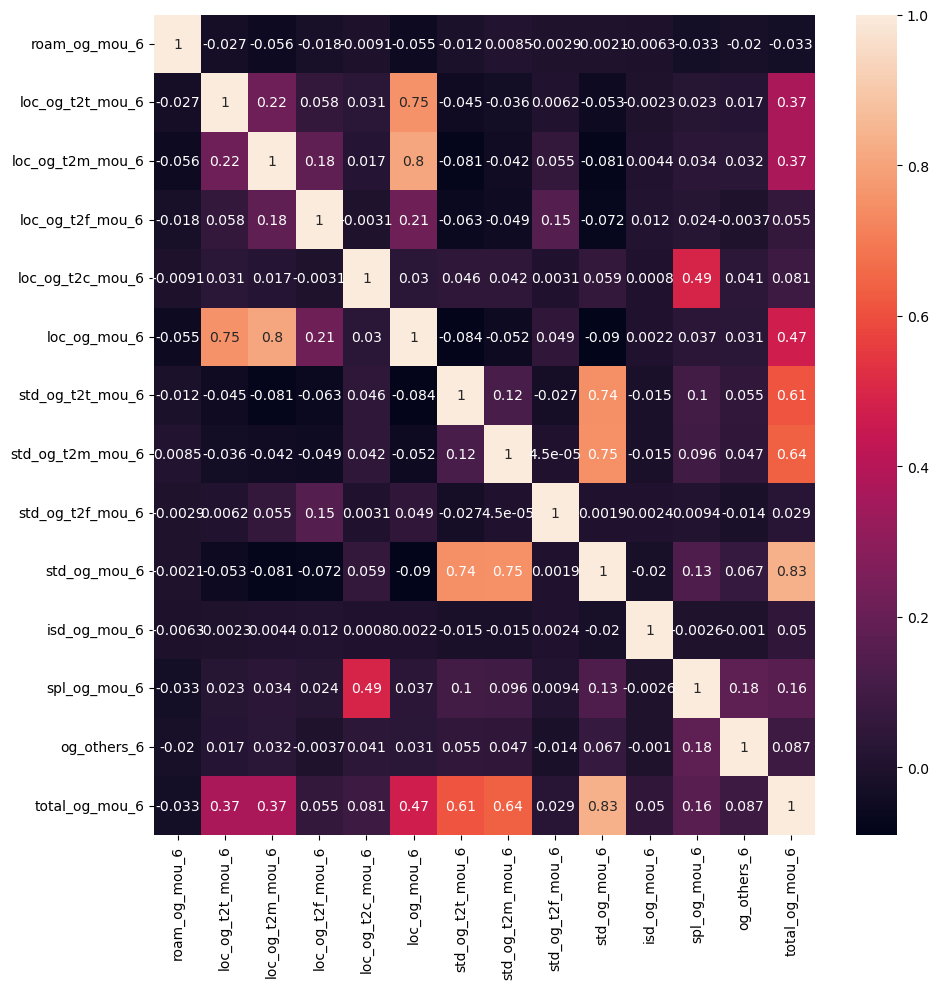

In [114]:

plt.figure(figsize=(10,10))
sns.heatmap(data[og_relation_6].corr(), annot=True)
plt.tight_layout();

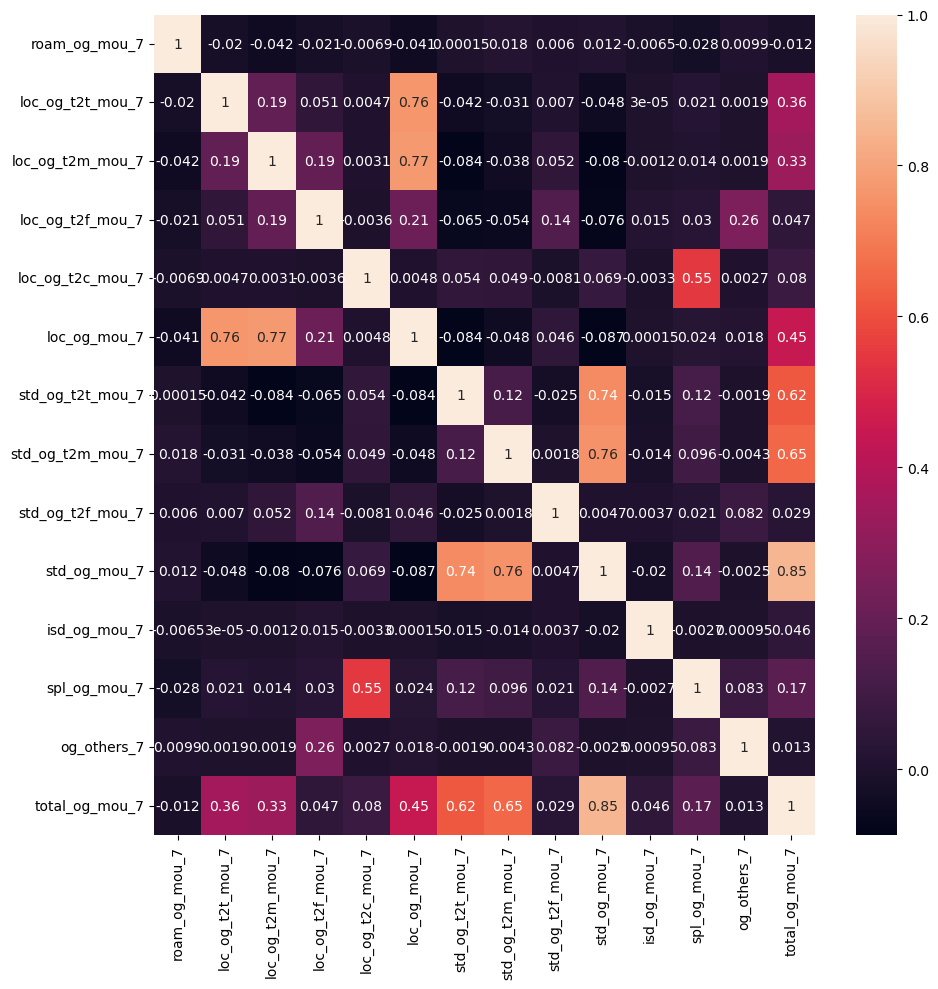

In [115]:

plt.figure(figsize=(10,10))
sns.heatmap(data[og_relation_7].corr(), annot=True)
plt.tight_layout();

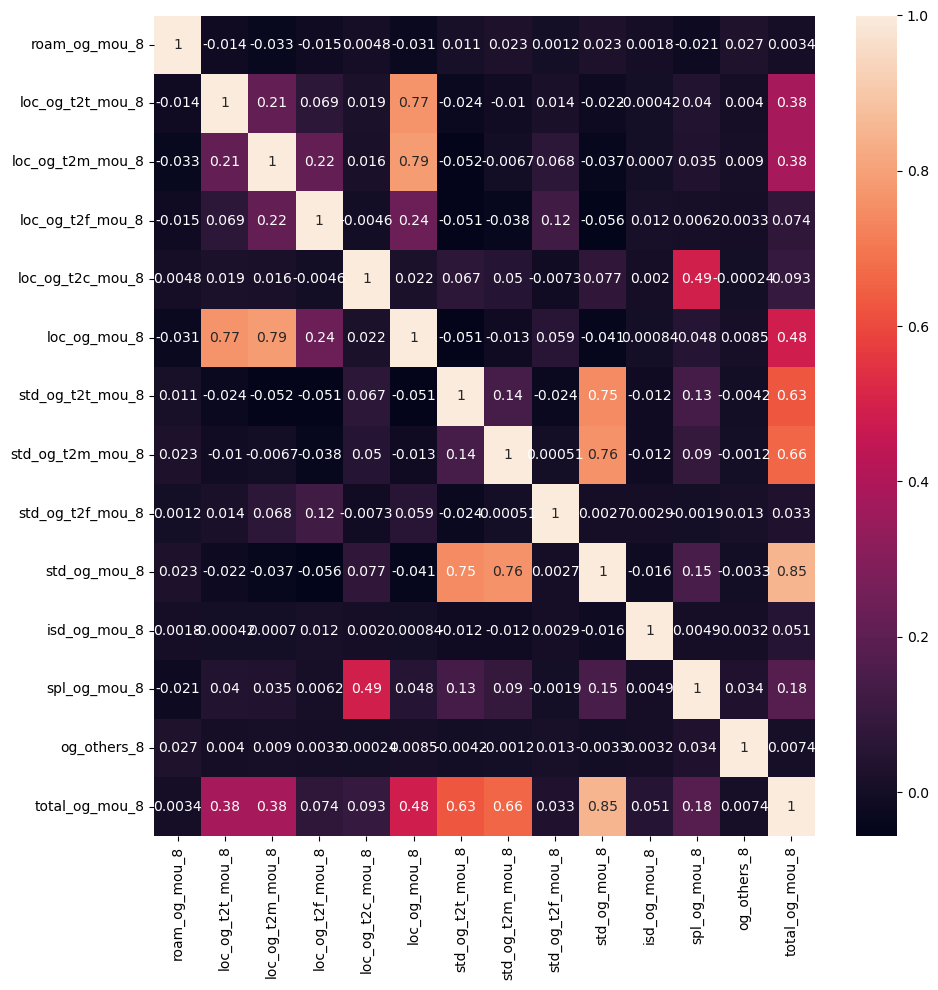

In [116]:

plt.figure(figsize=(10,10))
sns.heatmap(data[og_relation_8].corr(), annot=True)
plt.tight_layout();

In [117]:
og_relation_8

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8'],
      dtype='object')

In [118]:
com=['loc_og_t2t_mou_','loc_og_t2m_mou_','loc_og_t2f_mou_','loc_og_mou_','total_og_mou_']
drop_col=[]
for i in com:
    drop_col.append(i+'6')
    drop_col.append(i+'7')
    drop_col.append(i+'8')
data.drop(columns=drop_col, inplace=True)    
# data.drop(columns=['loc_og_t2t_mou_8'], inplace=True)

In [119]:
l=data.columns.to_list()
nl=[]
for i in l:
    if i[-1].isdigit():
        if i[-1]!='8':
            nl.append(i[:-1])
            nl=list(set(nl))
print(nl)


['last_day_rch_amt_', 'total_ic_mou_', 'sachet_3g_', 'av_rech_amt_data_', 'og_others_', 'monthly_2g_', 'std_ic_mou_', 'offnet_mou_', 'ic_others_', 'total_rech_num_', 'onnet_mou_', 'spl_og_mou_', 'total_rech_amt_', 'count_rech_2g_', 'std_ic_t2t_mou_', 'total_rech_data_', 'loc_ic_t2m_mou_', 'vol_3g_mb_', 'roam_ic_mou_', 'loc_ic_t2t_mou_', 'isd_og_mou_', 'count_rech_3g_', 'std_og_t2m_mou_', 'spl_ic_mou_', 'arpu_', 'std_ic_t2f_mou_', 'loc_og_t2c_mou_', 'max_rech_amt_', 'sachet_2g_', 'std_og_t2f_mou_', 'roam_og_mou_', 'vol_2g_mb_', 'std_ic_t2m_mou_', 'loc_ic_t2f_mou_', 'std_og_t2t_mou_', 'std_og_mou_', 'monthly_3g_', 'loc_ic_mou_', 'max_rech_data_', 'isd_ic_mou_']


In [120]:
data.shape

(30001, 125)

In [121]:

for i in nl:
    
    # for k in 
    # if agg[-1]!='8':
    #     print(1)
    j='av_'+i+'6_7'
    k=i+'6'
    l=i+'7'
    data[j]=(data[k]+data[l])/2
    data.drop(columns=k, inplace=True)
    data.drop(columns=l, inplace=True)
    
data


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,av_last_day_rch_amt_6_7,av_total_ic_mou_6_7,av_sachet_3g_6_7,av_av_rech_amt_data_6_7,av_og_others_6_7,av_monthly_2g_6_7,av_std_ic_mou_6_7,av_offnet_mou_6_7,av_ic_others_6_7,av_total_rech_num_6_7,av_onnet_mou_6_7,av_spl_og_mou_6_7,av_total_rech_amt_6_7,av_count_rech_2g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_loc_ic_t2m_mou_6_7,av_vol_3g_mb_6_7,av_roam_ic_mou_6_7,av_loc_ic_t2t_mou_6_7,av_isd_og_mou_6_7,av_count_rech_3g_6_7,av_std_og_t2m_mou_6_7,av_spl_ic_mou_6_7,av_arpu_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_max_rech_amt_6_7,av_sachet_2g_6_7,av_std_og_t2f_mou_6_7,av_roam_og_mou_6_7,av_vol_2g_mb_6_7,av_std_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_mou_6_7,av_monthly_3g_6_7,av_loc_ic_mou_6_7,av_max_rech_data_6_7,av_isd_ic_mou_6_7
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,0,0,1,0,968,30.40,0.00,101.20,1,252.0,0.000,0.0,252.0,0.00,0.0,0.000,0.000,0.000,3.5,0.000,0.000,307.0,0.0,0.000,1.0,0.000,117.165,0.00,0.000,0.000,1.0,0.000,0.000,206.1005,0.000,0.000,252.0,0.0,0.00,0.000,15.725,0.000,0.000,0.000,0.000,1.0,0.000,252.0,0.000
7,3171.480,52.29,325.91,31.64,38.06,0.00,12.01,49.14,16.68,77.84,10.01,6.50,0.0,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,1,0.0,592.250,0.0,0.0,0.00,0.0,176.810,510.295,15.465,5.0,56.260,2.250,1185.0,0.0,24.360,0.0,219.525,0.000,24.86,45.200,0.090,0.0,40.825,0.105,1209.5150,43.215,0.000,1185.0,0.0,13.37,18.165,0.000,109.215,126.810,13.795,68.000,0.0,391.555,0.0,8.295
8,137.362,35.08,136.48,0.00,0.00,7.15,22.58,75.69,0.00,98.28,0.00,10.23,0.0,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0,25.0,66.175,0.0,88.5,0.00,0.5,13.545,87.645,0.000,20.0,382.360,0.000,519.0,1.0,0.290,1.0,35.780,375.475,0.00,16.840,0.000,0.0,11.865,0.000,435.4720,0.000,0.000,122.0,0.5,0.00,0.000,178.000,13.255,0.000,124.995,136.870,0.0,52.630,77.0,0.000
21,637.760,85.14,983.39,0.00,0.00,0.00,61.79,876.99,0.00,938.79,0.00,0.00,0.0,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0,25.0,169.490,0.0,0.0,0.00,0.0,62.985,827.305,0.000,24.0,117.260,0.000,640.0,0.0,10.020,0.0,96.430,0.000,0.00,6.335,0.000,0.0,737.050,0.000,556.1030,0.000,0.000,50.0,0.0,0.00,0.000,0.000,52.960,3.725,111.935,848.990,0.0,106.505,0.0,0.000
23,366.966,33.58,205.89,0.00,0.00,17.71,0.00,39.61,0.00,39.61,0.00,17.71,0.0,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,179.0,0.0,2.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,51.86,0.00,0,89.5,171.235,0.0,178.0,0.00,0.0,8.915,87.385,2.675,4.0,49.810,0.050,227.0,0.0,0.255,1.0,104.635,299.545,0.00,40.875,0.005,1.0,4.355,0.000,134.1235,0.000,0.000,89.5,0.0,0.00,0.000,0.240,8.660,0.000,0.000,4.355,1.0,145.520,89.5,14.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [122]:
data['av_vbc_3g']=(data['jul_vbc_3g']+data['jun_vbc_3g'])/2

In [123]:
y = data.pop('churn')
X = data

In [124]:
X.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_last_day_rch_amt_6_7,av_total_ic_mou_6_7,av_sachet_3g_6_7,av_av_rech_amt_data_6_7,av_og_others_6_7,av_monthly_2g_6_7,av_std_ic_mou_6_7,av_offnet_mou_6_7,av_ic_others_6_7,av_total_rech_num_6_7,av_onnet_mou_6_7,av_spl_og_mou_6_7,av_total_rech_amt_6_7,av_count_rech_2g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_loc_ic_t2m_mou_6_7,av_vol_3g_mb_6_7,av_roam_ic_mou_6_7,av_loc_ic_t2t_mou_6_7,av_isd_og_mou_6_7,av_count_rech_3g_6_7,av_std_og_t2m_mou_6_7,av_spl_ic_mou_6_7,av_arpu_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_max_rech_amt_6_7,av_sachet_2g_6_7,av_std_og_t2f_mou_6_7,av_roam_og_mou_6_7,av_vol_2g_mb_6_7,av_std_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_mou_6_7,av_monthly_3g_6_7,av_loc_ic_mou_6_7,av_max_rech_data_6_7,av_isd_ic_mou_6_7,av_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,508.597957,234.112539,335.077044,12.500551,19.865615,1.707746,148.441175,157.350068,1.584734,307.379315,1.948970,6.557204,0.057607,62.619432,146.232731,14.403175,223.264679,13.913705,27.922597,2.561970,44.401653,279.922931,0.026567,10.998257,1.224455,9.972868,584.365454,160.144462,92.393654,1.621913,72.492917,1.208493,0.413420,122.132258,105.913072,351.493998,0.153628,1.054865,0.211026,0.202393,1209.368754,169.138860,178.872765,158.523962,100.624813,293.353741,0.218443,135.218053,0.351998,0.178877,47.917774,375.898565,1.326893,11.784924,264.306159,6.463458,660.615179,1.318923,15.158141,1.760758,151.018801,357.227634,14.376429,66.045108,2.138634,0.441835,183.677078,0.04040,559.636514,2.747149,1.73249,170.743275,1.140045,1.814799,23.361816,125.809755,30.008866,15.657016,170.059634,355.555232,0.223393,232.730594,78.960685,11.330242,168.698363
std,501.961981,458.448598,482.062509,74.125281,104.719009,7.208138,397.564547,409.100284,10.931804,608.976504,44.712024,20.311857,3.315125,158.912293,214.882624,43.305191,308.315153,71.338522,103.341828,19.896938,138.813305,361.175175,0.110697,70.600636,12.783238,9.274370,611.245907,173.207799,145.182324,2.996010,110.567519,2.537314,1.276497,195.586944,313.384838,919.021056,0.406486,2.535940,0.617549,1.100107,957.677989,420.974354,443.544138,416.734860,115.928063,350.965449,0.947966,182.000971,2.464511,0.387763,133.339333,457.633472,13.728038,8.634676,439.579176,17.314038,515.173412,2.401392,75.054257,2.7

In [125]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(random_state=42,n_neighbors=5)
X,y=adasyn.fit_resample(X,y)

In [126]:

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
col=X.columns
X[col]=scale.fit_transform(X[col])
X.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_last_day_rch_amt_6_7,av_total_ic_mou_6_7,av_sachet_3g_6_7,av_av_rech_amt_data_6_7,av_og_others_6_7,av_monthly_2g_6_7,av_std_ic_mou_6_7,av_offnet_mou_6_7,av_ic_others_6_7,av_total_rech_num_6_7,av_onnet_mou_6_7,av_spl_og_mou_6_7,av_total_rech_amt_6_7,av_count_rech_2g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_loc_ic_t2m_mou_6_7,av_vol_3g_mb_6_7,av_roam_ic_mou_6_7,av_loc_ic_t2t_mou_6_7,av_isd_og_mou_6_7,av_count_rech_3g_6_7,av_std_og_t2m_mou_6_7,av_spl_ic_mou_6_7,av_arpu_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_max_rech_amt_6_7,av_sachet_2g_6_7,av_std_og_t2f_mou_6_7,av_roam_og_mou_6_7,av_vol_2g_mb_6_7,av_std_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_mou_6_7,av_monthly_3g_6_7,av_loc_ic_mou_6_7,av_max_rech_data_6_7,av_isd_ic_mou_6_7,av_vbc_3g
count,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,55256.000000,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,55256.000000,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,55256.000000,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,55256.000000,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,55256.000000,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04,5.525600e+04
mean,-7.406845e-17,9.670047e-17,9.052810e-17,1.028728e-17,-3.909168e-17,-2.468948e-17,1.275623e-16,-4.937897e-17,-4.114914e-18,1.111027e-16,1.485227e-17,0.000000,3.343367e-18,2.880440e-17,-8.229828e-17,-1.234474e-17,-6.583862e-17,8.229828e-18,2.263203e-17,3.086185e-18,2.263203e-17,0.000000,8.229828e-18,4.526405e-17,2.057457e-18,-1.111027e-16,4.114914e-18,-4.114914e-18,7.406845e-17,-6.995353e-17,4.526405e-17,0.000000,-4.114914e-17,2.057457e-17,-2.057457e-17,3.703422e-17,4.114914e-17,0.000000,-4.114914e-18,2.057457e-17,-1.028728e-16,-2.468948e-17,-4.732151e-17,-1.645966e-17,-4.526405e-17,1.069878e-16,3.536254e-17,-6.172371e-17,-6.172371e-18,-4.114914e-18,1.543093e-18,-3.600550e-17,-8.744192e-18,6.378116e-17,-6.172371e-17,9.258556e-18,-1.558524e-16,3.394804e-17,-2.288921e-17,5.658006e-18,-4.526405e-17,5.555134e-17,8.744192e-18,5.760879e-17,1.131601e-17,-2.674694e-17,3.086185e-18,2.108893e-17,4.102055e-17,4.114914e-18,-5.143642e-19,4.114914e-18,-1.147032e-16,1.954584e-17,-1.234474e-17,3.600550e-17,4.114914e-17,0.000000,-2.880440e-17,-2.263203e-17,-8.847065e-17,-5.349388e-17,-1.152176e-16,1.877429e-17,1.645966e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.0000

In [135]:
from sklearn.decomposition import PCA 
pca=PCA(.95).fit(X)
pca_comp=pca.n_components_

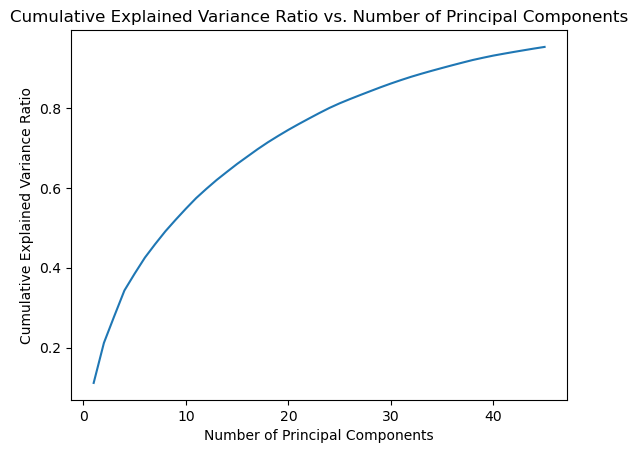

In [136]:
cum_sumed = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_sumed) + 1), cum_sumed)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()


In [ ]:
# from above we observed that 
# around 95 % data can be explained  by 45 Components
# and 99 % by 50+
# to keep the fetures less an dmake less complexity I will choose 30

In [138]:
from sklearn.decomposition import IncrementalPCA
pca2=IncrementalPCA(n_components=pca_comp)
X=pca2.fit_transform(X)

In [139]:
pca2.get_feature_names_out()

array(['incrementalpca0', 'incrementalpca1', 'incrementalpca2',
       'incrementalpca3', 'incrementalpca4', 'incrementalpca5',
       'incrementalpca6', 'incrementalpca7', 'incrementalpca8',
       'incrementalpca9', 'incrementalpca10', 'incrementalpca11',
       'incrementalpca12', 'incrementalpca13', 'incrementalpca14',
       'incrementalpca15', 'incrementalpca16', 'incrementalpca17',
       'incrementalpca18', 'incrementalpca19', 'incrementalpca20',
       'incrementalpca21', 'incrementalpca22', 'incrementalpca23',
       'incrementalpca24', 'incrementalpca25', 'incrementalpca26',
       'incrementalpca27', 'incrementalpca28', 'incrementalpca29',
       'incrementalpca30', 'incrementalpca31', 'incrementalpca32',
       'incrementalpca33', 'incrementalpca34', 'incrementalpca35',
       'incrementalpca36', 'incrementalpca37', 'incrementalpca38',
       'incrementalpca39', 'incrementalpca40', 'incrementalpca41',
       'incrementalpca42', 'incrementalpca43', 'incrementalpca44'],
    

In [140]:
X.shape

(55256, 45)

Modeling

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgm


In [142]:
from xgboost import XGBClassifier

In [144]:
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [145]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, precision_recall_curve, roc_auc_score, make_scorer

In [146]:
def eva(m,X, y):
    print('accuracy_score', accuracy_score(m.predict(X),y))
    print('recall_score', recall_score(m.predict(X),y))
    print('precision_score', precision_score(m.predict(X),y))
    print('auc_roc', roc_auc_score(m.predict(X),y))

In [147]:
eva(lr, X, y)

accuracy_score 0.8049261618647748
recall_score 0.7871083805709242
precision_score 0.8372689196995956
auc_roc 0.8061922984459584


Decision Tree

In [148]:
dt=DecisionTreeClassifier(random_state=42)

In [149]:
dt.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [150]:
eva(dt,X,y)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
auc_roc 1.0


In [151]:
rf=RandomForestClassifier(random_state=42).fit(X,y)
eva(rf,X,y)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
auc_roc 1.0


In [152]:
xg=XGBClassifier(random_state=42).fit(X,y)
eva(xg,X,y)

accuracy_score 0.9759483133053424
recall_score 0.9582855355094378
precision_score 0.995342287694974
auc_roc 0.9767077947470554


In [ ]:
# on default hyperparametrs least over fit model was XGBClassifier followed by RandomForestClassifier and then DecisionTreeClassifier
# while  r2 score of LR is negative indicating not suitable for the same 

hypertuning

In [ ]:
# for RandomForestClassifier & DT

In [153]:
para={'max_depth':[3,4,5,6,],
      'max_leaf_nodes':[10,20, 30,40,50],
      'n_estimators':[20,50,100, 150,200, 250],
      'learing_rate':[.001,.01,.1,1 ,10]}

In [154]:
from sklearn.model_selection import  RandomizedSearchCV

In [ ]:
# RandomizedSearchCV?

In [155]:
random_search=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=para, cv=5,scoring=['recall', 'precision'],refit='recall', n_jobs=-1)

In [157]:
random_search.fit(X,y)

c:\Users\dhima\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "learing_rate", "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learing_rate': [0.001, 0.01, 0.1, 1,
                                                         10],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'n_estimators': [20, 50, 100, 150, 200,
                                                         250]},
                   refit='recall', scoring=['recall', 'precision'])

In [158]:
random_search.best_params_
# d=pd.DataFrame(random_search.cv_results_)

# d.head()

{'n_estimators': 200,
 'max_leaf_nodes': 50,
 'max_depth': 6,
 'learing_rate': 0.1}

In [159]:
final_xg=XGBClassifier(n_estimators= 200,
max_leaf_nodes= 50,
 max_depth= 6,
 learing_rate= 0.1).fit(X,y)

c:\Users\dhima\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "learing_rate", "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


In [160]:
eva(final_xg, X, y)

accuracy_score 0.9967605327928188
recall_score 0.9937556073927867
precision_score 0.9998194685153091
auc_roc 0.9967865328410029


In [161]:
final_xg.

array([0.05012403, 0.04562018, 0.06012372, 0.02135121, 0.01766619,
       0.01586744, 0.01514916, 0.07813294, 0.02581396, 0.02781902,
       0.05170043, 0.02591709, 0.01247531, 0.03031345, 0.01256646,
       0.01558704, 0.034951  , 0.03157242, 0.01211703, 0.01578485,
       0.01249878, 0.01543632, 0.02497304, 0.01255609, 0.01282609,
       0.02348262, 0.01542514, 0.03009762, 0.01550075, 0.01935847,
       0.01201383, 0.01497185, 0.01422815, 0.01536626, 0.01217335,
       0.01702303, 0.01332763, 0.01480231, 0.01216439, 0.01469694,
       0.0120412 , 0.02148485, 0.0115732 , 0.02054385, 0.01078121],
      dtype=float32)

TEsting

In [164]:
churn_data.columns


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'sep_vbc_3g'],
      dtype='object')

In [ ]:
para_rf={'max_depth':[3,4,5,6,],
      'max_leaf_nodes':[10,20, 30,40,50],
      'n_estimators':[20,50,100, 150,200, 250],
      }

In [ ]:
random_search=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=para_rf, cv=3,scoring=['recall','precision'],refit='recall', n_jobs=-1)

In [ ]:
random_search.fit(X,y)

KeyboardInterrupt: 

In [ ]:
d=pd.DataFrame(random_search.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_leaf_nodes,param_max_depth,params,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,2.869044,0.570461,0.067584,0.018735,100,50,3,"{'n_estimators': 100, 'max_leaf_nodes': 50, 'm...",0.770455,0.795003,0.801705,0.789054,0.013433,10,0.897419,0.892857,0.894170,0.894815,0.001917,3
1,6.785631,0.679196,0.102865,0.006722,250,30,3,"{'n_estimators': 250, 'max_leaf_nodes': 30, 'm...",0.763636,0.805224,0.805114,0.791325,0.019579,8,0.893617,0.890144,0.892880,0.892214,0.001494,6
2,0.474637,0.006403,0.024498,0.003029,20,10,3,"{'n_estimators': 20, 'max_leaf_nodes': 10, 'ma...",0.774432,0.802953,0.800000,0.792462,0.012806,6,0.883917,0.880997,0.887209,0.884041,0.002537,10
3,0.699986,0.014346,0.020837,0.007366,20,40,5,"{'n_estimators': 20, 'max_leaf_nodes': 40, 'ma...",0.810795,0.859171,0.832386,0.834118,0.019787,1,0.899181,0.878630,0.883595,0.887135,0.008756,9
4,4.194792,0.072624,0.062762,0.000186,150,10,4,"{'n_estimators': 150, 'max_leaf_nodes': 10, 'm...",0.771591,0.804089,0.813068,0.796249,0.017817,5,0.898148,0.891688,0.894375,0.894737,0.002650,4
5,3.326329,0.036788,0.067717,0.007363,150,30,3,"{'n_estimators': 150, 'max_leaf_nodes': 30, 'm...",0.762500,0.799546,0.811932,0.791326,0.021001,7,0.887566,0.890576,0.885378,0.887840,0.002131,8
6,0.557836,0.007747,0.015763,0.000193,20,50,4,"{'n_estimators': 20, 'max_leaf_nodes': 50, 'ma...",0.763636,0.814310,0.814205,0.797384,0.023863,4,0.897196,0.888476,0.887856,0.891176,0.004264,7
7,4.375072,0.067632,0.078130,0.000006,200,30,3,"{'n_estimators': 200, 'max_leaf_nodes': 30, 'm...",0.760795,0.803521,0.809091,0.791136,0.021574,9,0.896852,0.895570,0.891114,0.894512,0.002459,5
8,8.426583,0.078233,0.104216,0.007383,250,40,5,"{'n_estimators': 250, 'max_leaf_nodes': 40, 'm...",0.789773,0.826235,0.827273,0.814427,0.017438,3,0.902012,0.897041,0.897104,0.898719,0.002329,1
9,4.995755,0.044809,0.072918,0.007376,150,30,5,"{'n_estimators': 150, 'max_leaf_nodes': 30, 'm...",0.782386,0.825099,0.837500,0.814995,0.023607,2,0.902359,0.893055,0.892252,0.895889,0.004587,2


In [ ]:
rf_2=RandomForestClassifier(n_estimators= 20, max_leaf_nodes= 50,max_depth= 6)

In [ ]:
rf_2.fit(X,y)

RandomForestClassifier(max_depth=6, max_leaf_nodes=50, n_estimators=20)

In [ ]:
eva(rf_2,X,y)

accuracy_score 0.8881840560499905
recall_score 0.916159155501421
precision_score 0.854572997538345
auc_roc 0.889946149787616


XGboost

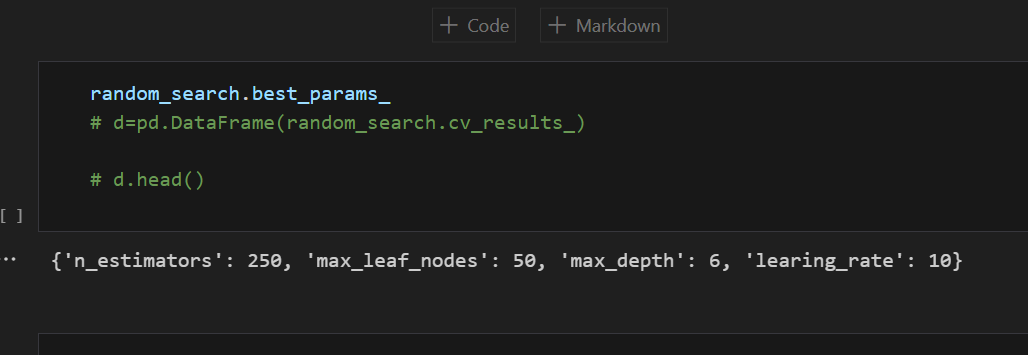

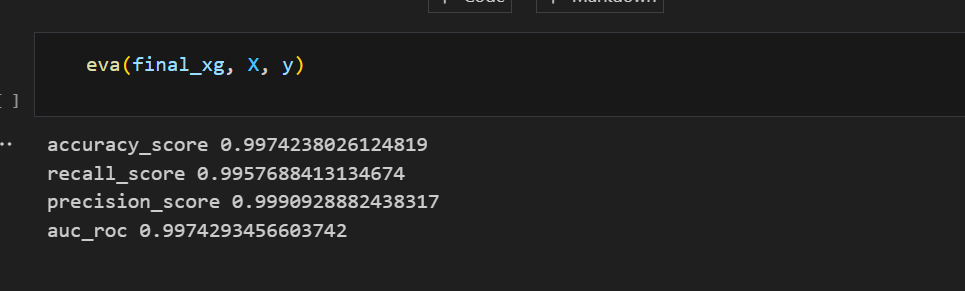